# Unit 5 - Financial Planning


In [71]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv.main import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Adding dotenv to environment
!pip install python-dotenv

In [20]:
# os.getenv("Alpaca_API_key")

In [72]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [73]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [74]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [75]:
btc_request = requests.get(btc_url).json()
current_btc_price = btc_request["data"]["1"]["quotes"]["USD"]["price"]

In [76]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
current_btc_price = btc_request["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_request = requests.get(eth_url).json()
current_price_eth = eth_request["data"]["1027"]["quotes"]["USD"]["price"]

#Caluculate value of my holdhings
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56841.60
The current value of your 5.3 ETH is $19861.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [77]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [78]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("Alpaca_API_key")
alpaca_secret_key = os.getenv("Alpaca_API_secret_key")



# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")
alpaca

In [79]:
# Format current date as ISO format
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investment = alpaca.get_barset(tickers, timeframe, start=today, limit=1000).df


# Preview DataFrame
df_investment


AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   
...                           ...       ...       ...      ...       ...   
2021-12-27 00:00:00-05:00  114.15  114.3000  114.1300  114.270   5069840   
2021-12-28 00:00:00-05:00  114.43  114.4500  114.1700  114.220   4892072   
2021-12-29 00:00:00-05:00  113.99  114.0500  113.8100  113.870   5712959   
2021-12-30 00:00:00-05:00  113.99  114.1300  113.8300  114.120   5044053   
2021-12-31 00:00:00-05:00  114.15  114.3100  114.0600  114.090   6557778   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538  
...                           ...       ...     ...     ...        ...  
2021-12-27 00:00:00-05:00  472.03  477.3100  472.01  477.27   46260198  
2021-12-28 00:00:00-05:00  477.72  478.8100  476.06  476.89   37370466  
2021-12-29 00:00:00-05:00  477.00  478.5600  475.92  477.46   47223213  
2021-12-30 00:00:00-05:00  477.93  479.0000  475.67  476.15   44681636  
2021-12-31 00:00:00-05:00  475.64  476.8600  474.67  474.89   51212452  

[422 rows x 10 columns]

In [81]:
agg_close_price = df_investment.loc["2021-12-29 00:00:00-05:00", "AGG"]["close"]

In [82]:
idx = pd.IndexSlice
df_investment.loc["2021-12-29 00:00:00-05:00", idx["AGG","close"]]

113.87

In [83]:
# Pick AGG close prices
agg_close_price = df_investment.loc["2021-12-29 00:00:00-05:00", "AGG"]["close"]

# Print AGG close prices
print(f"Current AGG closing price: ${agg_close_price}")

Current AGG closing price: $113.87


In [84]:
# Pick SPY close prices
spy_close_price = df_investment.loc["2021-12-29 00:00:00-05:00", "SPY"]["close"]


# Print SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")

Current SPY closing price: $477.46


In [85]:
# Compute the current value of shares
my_spy = 50
my_agg = 200

spy_value = my_spy*spy_close_price
agg_value = my_agg*agg_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $23873.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [86]:
# Set monthly household income
monthly_income = 12000

# Create variables for aggregated  holdings in stocks and cryptocurrencies
crypto = my_btc_value + my_eth_value
stocks = spy_value + agg_value

# Create savings DataFrame
savings_data = {'asset type': ['crypto', 'stocks'],
                'amount': [crypto, stocks]}
df_savings = pd.DataFrame(data=savings_data, index=['crypto', 'stocks'])


# Display savings DataFrame
display(df_savings)

,asset type,amount
crypto,crypto,76703.085
stocks,stocks,46647.000


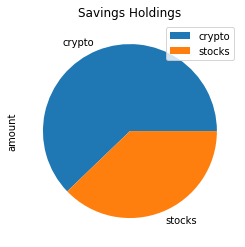

In [87]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Savings Holdings");

In [88]:
# Set ideal emergency fund
emergency_fund_target = monthly_income * 3

# Calculate total amount of savings
total_current_savings_amount = crypto + stocks

# Validate saving health
if emergency_fund_target < total_current_savings_amount:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_current_savings_amount == emergency_fund_target:
    print("Great, You have saved three times your monthly expenses! Keep up pushing to increase your savings.")
else: print(f"You are ${(emergency_fund_target - total_current_savings_amount):.2f} away from your emergency\
fund goal, continue savings between 10% - 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [89]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [100]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8, .2],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [101]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [102]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001603,0.999779,0.999955,1.000698,1.003355,1.006136,1.009859,1.001619,0.999500,1.006415,...,1.004485,0.997061,0.997436,0.999166,1.000812,1.001324,0.998582,1.000078,0.996091,1.000671
2,1.003133,0.996505,1.000316,1.008014,1.001949,1.010574,1.009582,1.000844,1.005608,1.003782,...,1.006917,0.994641,0.997087,0.996784,0.998564,1.004117,0.995687,1.001937,1.001921,1.001923
3,1.009300,0.998182,0.998530,1.010278,0.999853,1.012029,1.010960,1.000040,1.006781,1.002507,...,1.009441,0.999079,0.993683,1.002256,0.995775,1.006798,0.993873,1.001965,1.000211,0.991850
4,1.007279,0.995008,0.996585,1.009156,0.996015,1.012852,1.014266,1.007435,1.003750,0.996617,...,1.008111,1.000418,1.000704,0.997629,0.996122,1.007512,0.993990,1.008159,0.994872,0.995597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.993291,2.160551,3.011771,3.174949,2.712492,3.326223,2.846180,3.344995,2.618854,3.578354,...,2.653238,4.017478,2.327424,2.472227,5.520543,3.887294,2.760185,2.929627,2.897574,2.737724
7557,3.001527,2.155026,3.010968,3.159575,2.712882,3.330434,2.843961,3.339900,2.629381,3.559392,...,2.659279,4.011111,2.320135,2.480065,5.523800,3.894721,2.747516,2.927547,2.894253,2.745910
7558,3.012740,2.155825,3.019354,3.165732,2.729607,3.321455,2.853799,3.340329,2.643334,3.571857,...,2.650432,3.988941,2.327105,2.485674,5.521656,3.913656,2.745681,2.922440,2.899966,2.738294
7559,3.020708,2.166345,3.013035,3.158551,2.744459,3.333225,2.847012,3.345899,2.649734,3.570798,...,2.654146,3.988639,2.323243,2.478426,5.532922,3.926120,2.770088,2.906144,2.906059,2.739180


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

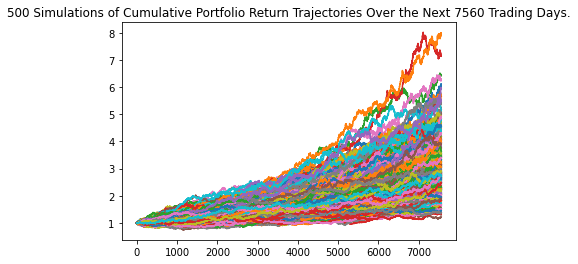

In [103]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()
line_plot

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

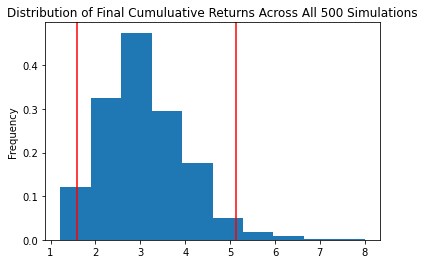

In [104]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()
dist_plot

### Retirement Analysis

In [105]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              3.077640
std               0.939567
min               1.218609
25%               2.469339
50%               2.931896
75%               3.598574
max               7.998443
95% CI Lower      1.581988
95% CI Upper      5.142275
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [106]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8], 2)
ci_upper = round(tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $1.58 and $5.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [107]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8], 2)
ci_upper = round(tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $1.58 and $5.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [108]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8, .2],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [109]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997003,1.002911,0.998353,0.995365,1.002771,0.993836,1.002508,1.002980,1.001962,1.001545,...,1.006145,1.005898,1.004351,1.000419,0.999812,1.000454,1.000963,0.991192,0.998135,1.002269
2,0.998927,0.999424,0.992967,0.992213,1.003055,0.995684,1.003190,1.004138,1.005083,0.999748,...,1.007625,1.007249,1.008030,0.999856,0.996317,0.995467,0.997292,0.994031,1.002037,1.010509
3,0.998711,1.000507,0.990700,0.993979,1.007233,0.994895,1.002710,1.006441,1.006135,1.000695,...,1.007447,1.005821,1.010320,0.998608,0.998250,0.997591,1.000091,0.997099,1.001785,1.010680
4,1.005151,1.000974,0.992465,0.989856,1.011807,0.987919,1.003435,1.006651,1.008402,1.003005,...,1.004380,1.006690,1.008104,0.997498,0.998852,0.999808,0.998343,0.989874,1.000937,1.013683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.984060,1.126054,1.085052,1.116702,1.412714,0.951999,1.426143,1.120390,1.147995,1.372649,...,1.059710,1.472413,1.072392,1.208217,1.178007,1.075864,1.240743,0.962870,1.555406,1.241128
1257,0.986831,1.121841,1.082350,1.108560,1.410257,0.958357,1.426505,1.120927,1.142707,1.368661,...,1.061354,1.468467,1.072549,1.208529,1.176727,1.078690,1.239165,0.962514,1.553537,1.239206
1258,0.982731,1.119803,1.077421,1.109874,1.413220,0.954504,1.431256,1.113248,1.139521,1.367047,...,1.066541,1.470171,1.070302,1.210528,1.176478,1.083656,1.243936,0.960135,1.550794,1.231116
1259,0.988700,1.115662,1.077843,1.113171,1.423717,0.953269,1.428481,1.112884,1.137551,1.355543,...,1.066454,1.470730,1.064927,1.203521,1.173032,1.084002,1.247733,0.958146,1.553352,1.230118


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

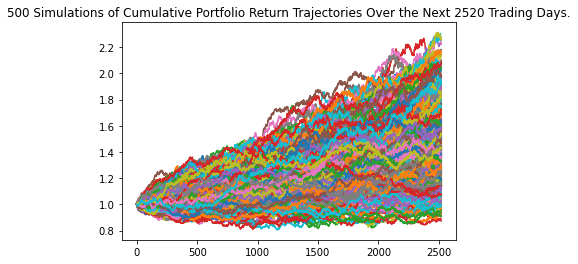

In [115]:
# Plot simulation outcomes
line_plot_5 = MC_fiveyear.plot_simulation()
line_plot_5

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

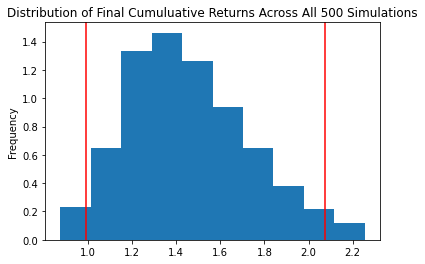

In [116]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_fiveyear.plot_distribution()
dist_plot_5

In [117]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl_2

count           500.000000
mean              1.454345
std               0.273448
min               0.873948
25%               1.252886
50%               1.418992
75%               1.627927
max               2.254890
95% CI Lower      0.991048
95% CI Upper      2.074963
Name: 2520, dtype: float64

In [118]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8], 2)
ci_upper_five = round(tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $1.58 and $5.14


### Ten Years Retirement Option

In [119]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8, .2],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [120]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999864,1.006230,1.004034,1.000615,0.999454,1.005497,0.998476,1.001673,0.998954,1.005774,...,1.003749,1.001708,0.985471,1.005571,1.002706,0.997795,0.997817,1.001711,0.996202,0.998366
2,0.998109,1.004537,0.997672,1.008090,0.998029,1.008162,1.001441,1.006328,1.000760,0.995729,...,0.999318,1.005204,0.984166,1.010468,1.004987,0.993338,0.999399,1.004325,0.996534,0.995059
3,0.997183,1.003629,0.996970,1.011082,1.000462,1.012195,1.003040,1.013061,0.996497,0.995993,...,1.000173,1.009450,0.990040,1.003270,1.014768,0.994237,1.003023,1.006270,1.003143,0.999027
4,1.000803,1.001844,0.992136,1.005627,0.993943,1.011551,1.002031,1.015449,0.995995,0.998615,...,1.002557,1.004591,0.992476,1.002092,1.021287,0.992011,1.003950,1.007242,1.001010,0.998039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.648634,1.561346,1.409223,1.590287,1.277515,1.539625,2.119748,1.351243,2.625563,1.508860,...,1.609821,1.293104,1.167707,1.596197,1.578980,1.467498,2.060554,1.056428,0.804354,1.423664
2517,1.652275,1.554779,1.409091,1.582652,1.281829,1.531582,2.112198,1.350414,2.616642,1.506020,...,1.599282,1.298470,1.171077,1.597199,1.578212,1.462728,2.064236,1.059482,0.801786,1.416996
2518,1.658823,1.555960,1.407191,1.574973,1.290449,1.532914,2.127427,1.352700,2.614969,1.503385,...,1.604581,1.305832,1.164826,1.594483,1.576937,1.462715,2.074221,1.059900,0.804988,1.422939
2519,1.667391,1.572240,1.415506,1.576162,1.293118,1.542215,2.123238,1.342268,2.593722,1.500428,...,1.600884,1.296885,1.158750,1.597813,1.573488,1.459498,2.061346,1.060323,0.806440,1.420265


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

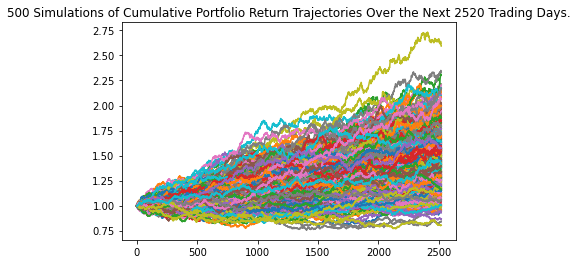

In [121]:
# Plot simulation outcomes
line_plot_10 = MC_tenyear.plot_simulation()
line_plot_10

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

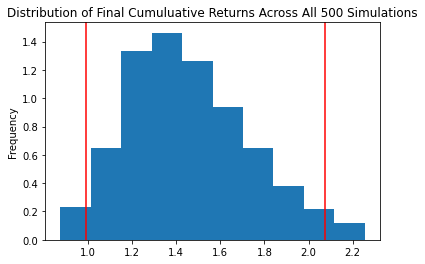

In [122]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_fiveyear.plot_distribution()
dist_plot_10

In [123]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl_3

count           500.000000
mean              1.454345
std               0.273448
min               0.873948
25%               1.252886
50%               1.418992
75%               1.627927
max               2.254890
95% CI Lower      0.991048
95% CI Upper      2.074963
Name: 2520, dtype: float64

In [124]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8], 2)
ci_upper_ten = round(tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $1.58 and $5.14
